---------------------
# TITANIC SURVIVAL PREDICTION
-------------------

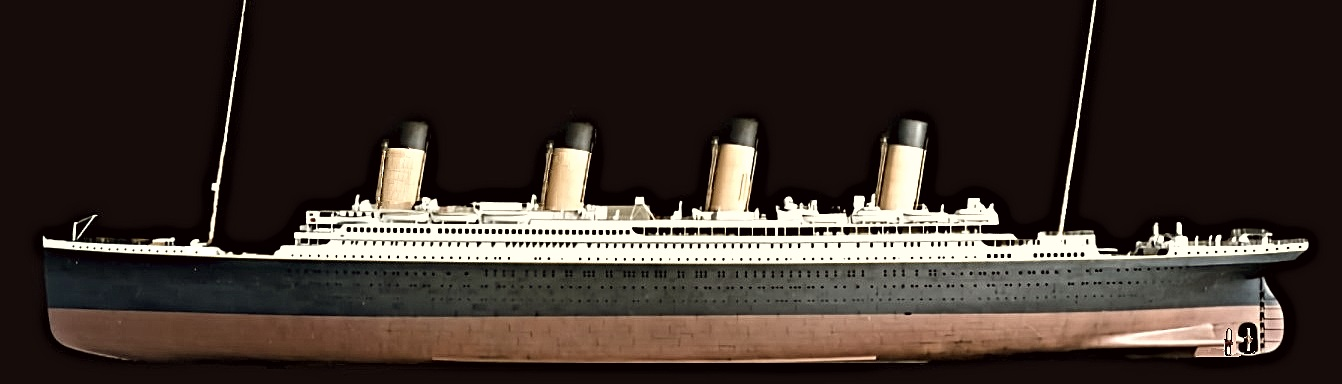


**Approach to Titanic survival prediction**
1. Import all the libraries
2. Load and Audit the data
3. Data preparation and Data Transformation
      1. Missing values
      2. Inconistent values
      3. Outliers
4. Data Visualization
5. Data Analysis
      1. Uni-Variant Analysis
      2. Bi-Varient Analysis
      3. Multi-Varient Analysis
          * Regression:Not a regression problem
          * Classification
      4.Compare results
-----


# IMPORTNG THE LIBRARIES
-----------------------

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder


# LOAD THE DATA AND AUDIT
------------

In [85]:
df=pd.read_csv("/content/tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [87]:
print("No of Rows:",df.shape[0])
print("No of Columns:",df.shape[1])

No of Rows: 418
No of Columns: 12


In [88]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# DATA PREPARATION
----

Checking for missing values

In [89]:
#Checking for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [90]:
#Handling missing value
df['Age']=np.where(df['Age'].isna(),df['Age'].median(skipna=True),df['Age'])
df['Fare']=np.where(df['Fare'].isna(),df['Fare'].median(skipna=True),df['Fare'])

In [91]:
#Dropping the unwanted columns
df.drop(['PassengerId'],axis=1,inplace=True)
df.drop(['Name'],axis=1,inplace=True)
df.drop(['Cabin'],axis=1,inplace=True)
df.drop(['Ticket'],axis=1,inplace=True)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


Outliers handling

In [93]:
#Checking for outliers
df.skew()

<ipython-input-93-57747bf9a6d3>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Survived    0.568991
Pclass     -0.534170
Age         0.660747
SibSp       4.168337
Parch       4.654462
Fare        3.692299
dtype: float64

<Axes: >

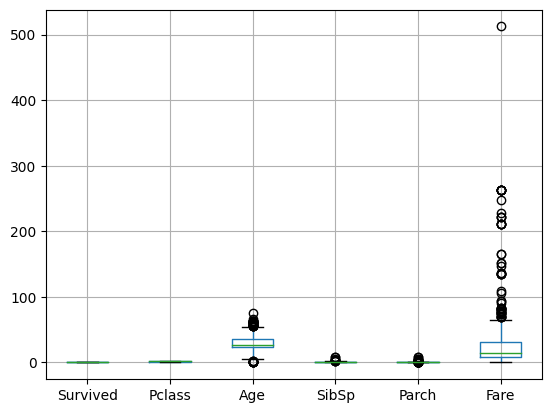

In [94]:
df.boxplot()

In [95]:
#Removing the outlier
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    return lower_range,upper_range

In [96]:
low_leadtime,high_leadtime=remove_outlier(df['Age'])
df['Age']=np.where(df['Age']>high_leadtime,high_leadtime,df['Age'])
df['Age']=np.where(df['Age']<low_leadtime,low_leadtime,df['Age'])

In [97]:
low_leadtime,high_leadtime=remove_outlier(df['SibSp'])
df['SibSp']=np.where(df['SibSp']>high_leadtime,high_leadtime,df['SibSp'])
df['SibSp']=np.where(df['SibSp']<low_leadtime,low_leadtime,df['SibSp'])

In [98]:
low_leadtime,high_leadtime=remove_outlier(df['Parch'])
df['Parch']=np.where(df['Parch']>high_leadtime,high_leadtime,df['Parch'])
df['Parch']=np.where(df['Parch']<low_leadtime,low_leadtime,df['Parch'])

In [99]:
low_leadtime,high_leadtime=remove_outlier(df['Fare'])
df['Fare']=np.where(df['Fare']>high_leadtime,high_leadtime,df['Fare'])
df['Fare']=np.where(df['Fare']<low_leadtime,low_leadtime,df['Fare'])

<Axes: >

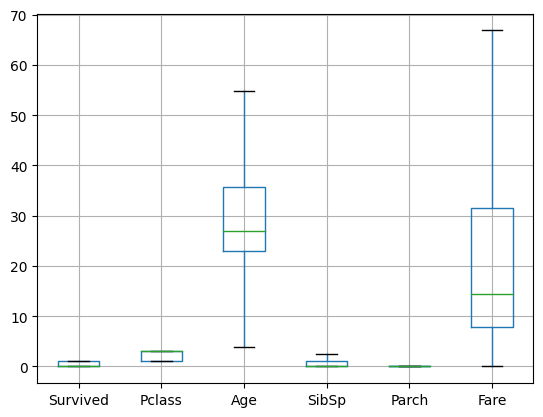

In [100]:
df.boxplot()

In [101]:
df.skew()

<ipython-input-101-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Survived    0.568991
Pclass     -0.534170
Age         0.453769
SibSp       1.555930
Parch       0.000000
Fare        1.089267
dtype: float64

# DATA VISUALIZATION
----

<Axes: ylabel='Pclass'>

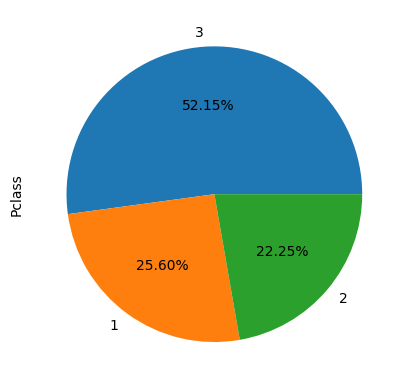

In [102]:
df['Pclass'].value_counts().plot(kind='pie',autopct='%1.2f%%')

<Axes: ylabel='Survived'>

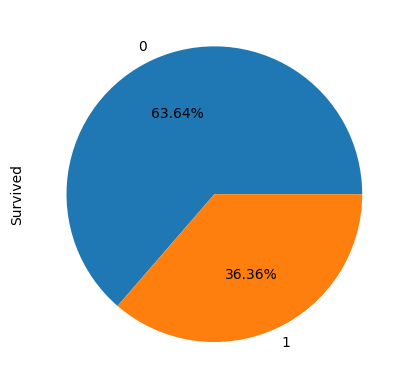

In [103]:
df['Survived'].value_counts().plot(kind='pie',autopct='%1.2f%%')

columns :  Survived


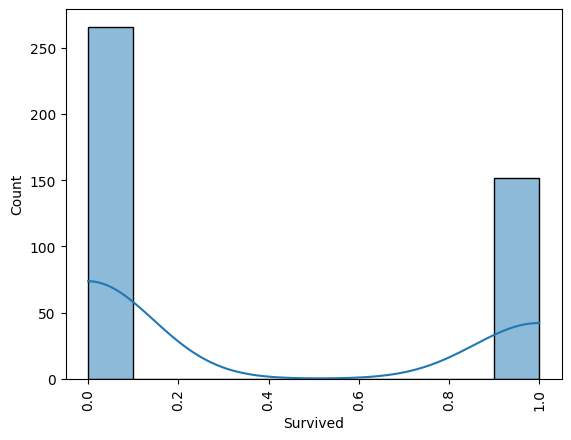

columns :  Pclass


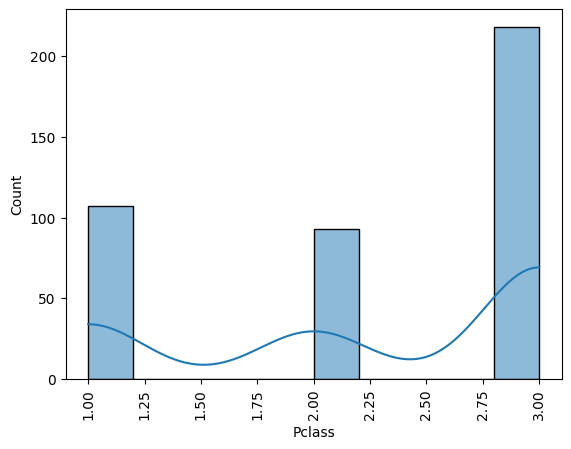

columns :  Sex


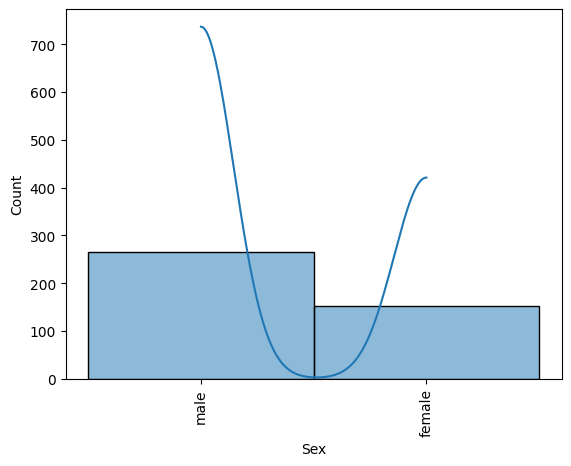

columns :  Age


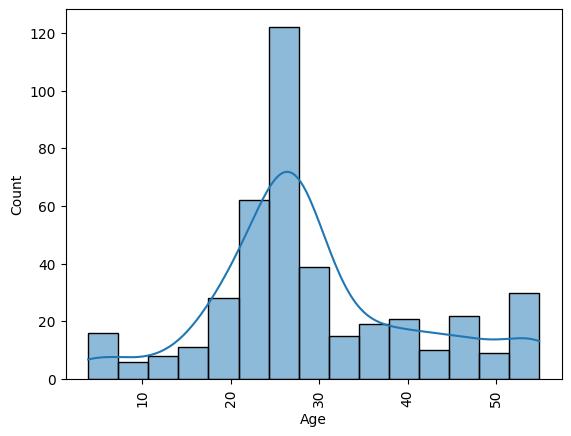

columns :  SibSp


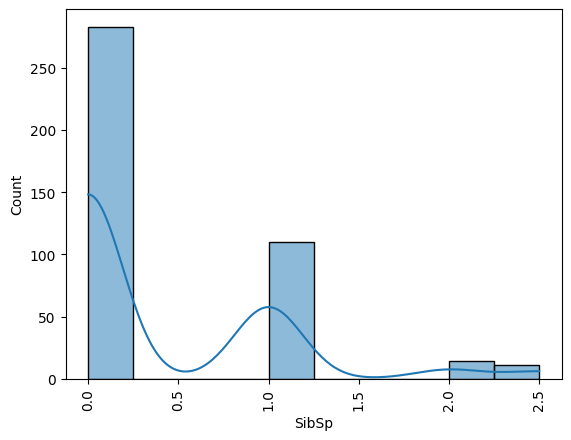

columns :  Parch


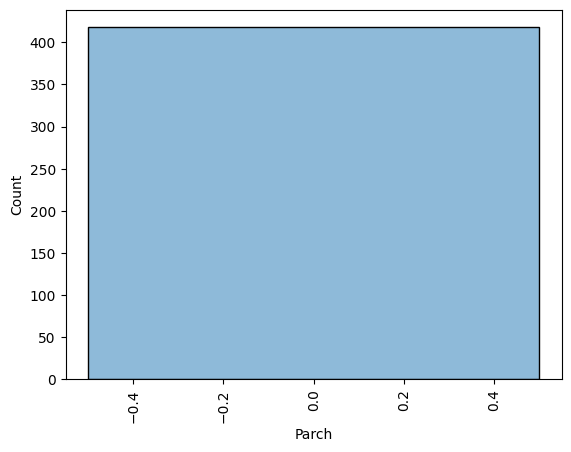

columns :  Fare


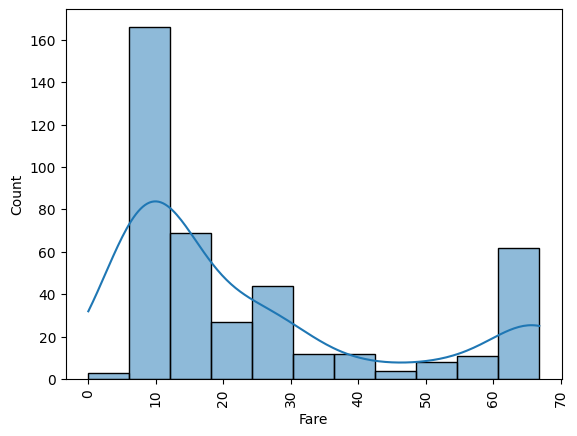

columns :  Embarked


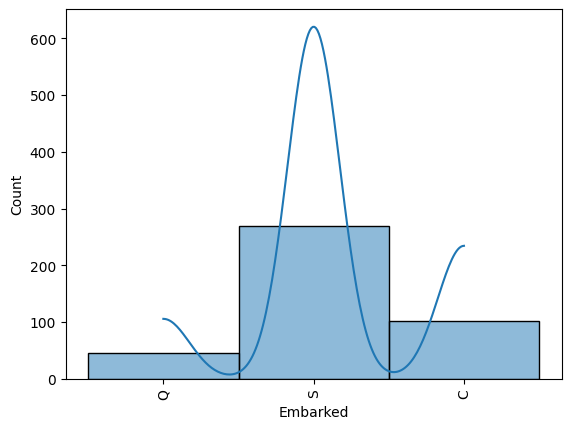

In [104]:
for i in df.columns:
    sns.histplot(df[i],kde=True)
    print('columns : ' , i )
    plt.xticks(rotation = 'vertical')
    plt.show()

columns :  Survived


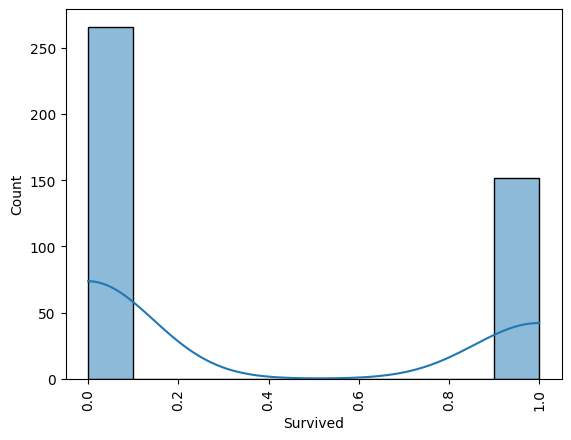

columns :  Pclass


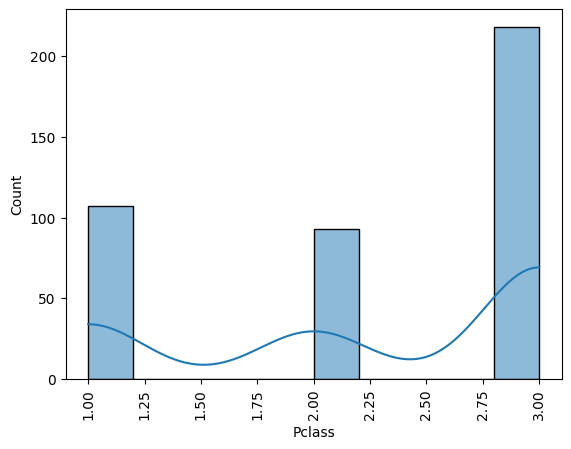

columns :  Sex


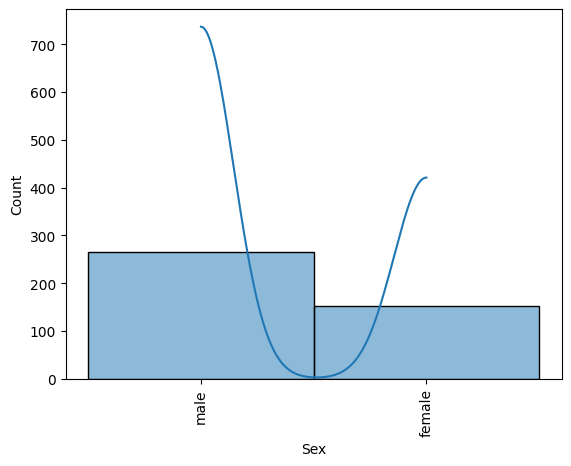

columns :  Age


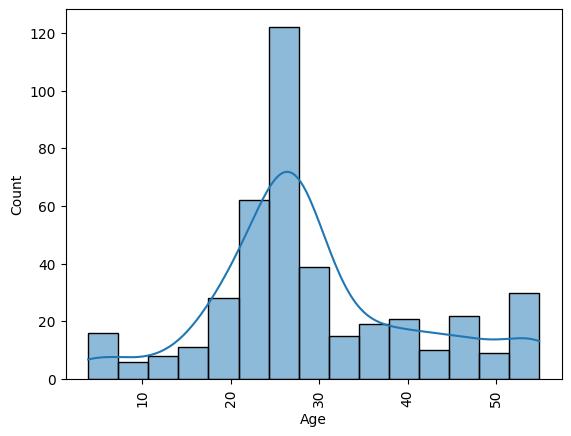

columns :  SibSp


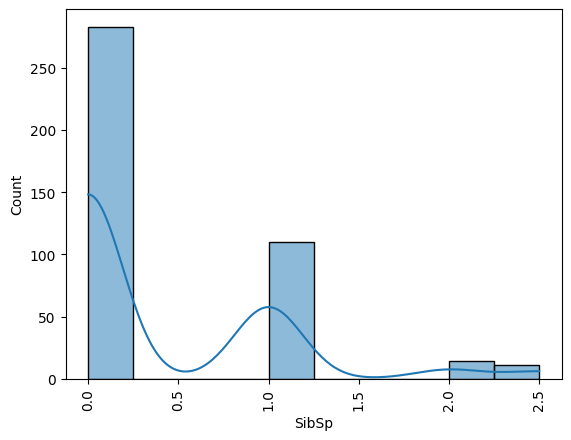

columns :  Parch


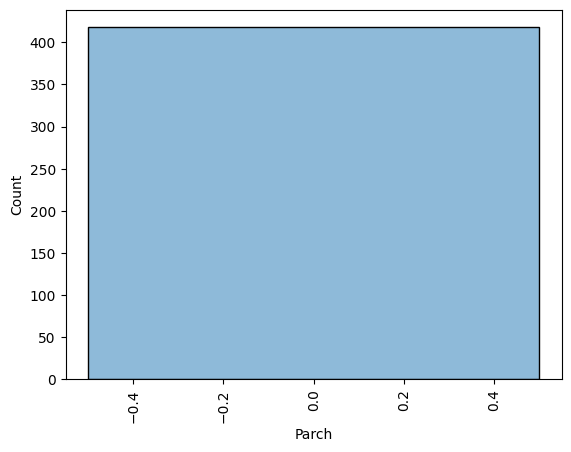

columns :  Fare


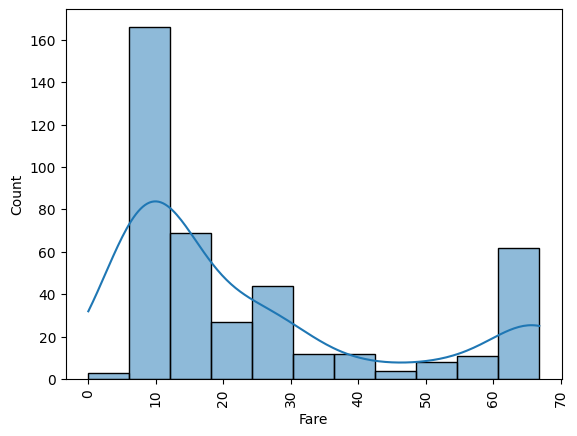

columns :  Embarked


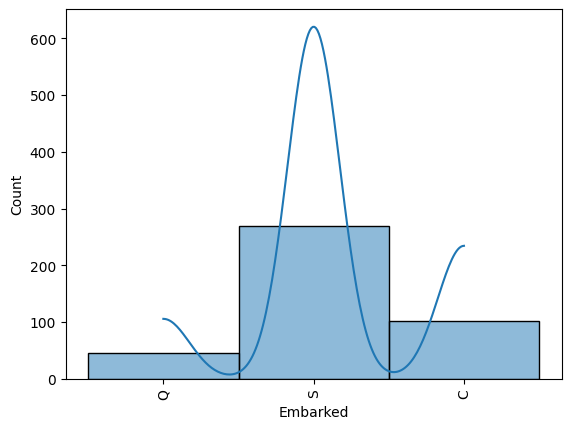

In [105]:
for i in df.columns:
    sns.histplot(df[i],kde=True)
    print('columns : ' , i )
    plt.xticks(rotation = 'vertical')
    plt.show()

Pclass  Survived
1       0           0.532710
        1           0.467290
2       0           0.677419
        1           0.322581
3       0           0.669725
        1           0.330275
Name: Survived, dtype: float64


<Axes: xlabel='Survived', ylabel='Age'>

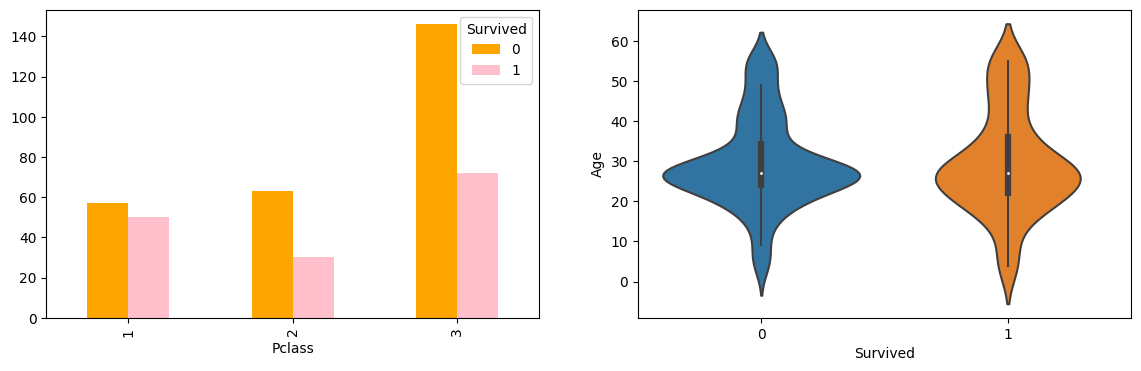

In [106]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
pd.crosstab(df.Pclass,df.Survived).plot(kind="bar",ax=ax1,color=("orange","pink"))
s = df.groupby(['Pclass'])['Survived'].value_counts(normalize=True)
print(s)
sns.violinplot(x="Survived",y="Age",data=df,ax=ax2)

Sex     Survived
female  1           1.0
male    0           1.0
Name: Survived, dtype: float64


<Axes: xlabel='Pclass', ylabel='Sex'>

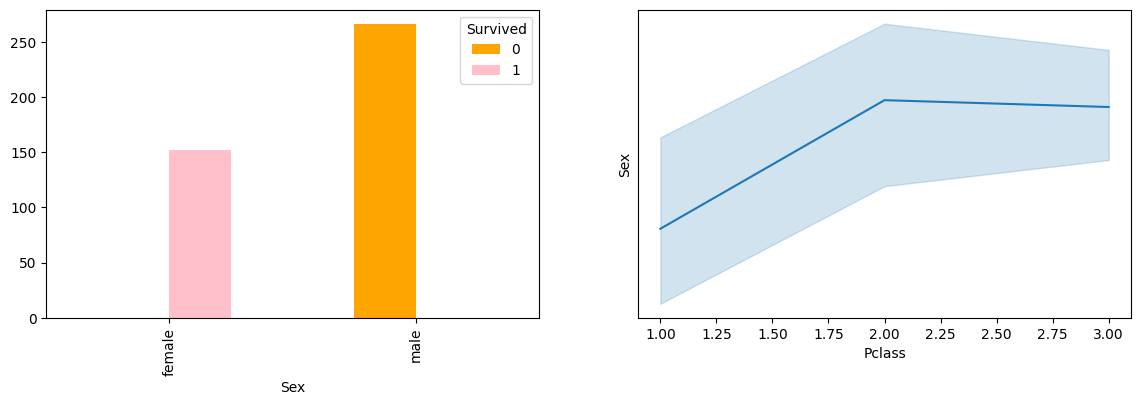

In [107]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
pd.crosstab(df.Sex,df.Survived).plot(kind="bar",ax=ax1,color=("orange","pink"))
s = df.groupby(['Sex'])['Survived'].value_counts(normalize=True)
print(s)
sns.lineplot(
    y="Sex",
    x="Pclass",
    data=df,ax=ax2)

Sex     SibSp
female  0.0      0.578947
        1.0      0.355263
        2.0      0.039474
        2.5      0.026316
male    0.0      0.733083
        1.0      0.210526
        2.0      0.030075
        2.5      0.026316
Name: SibSp, dtype: float64


<Axes: xlabel='SibSp', ylabel='Survived'>

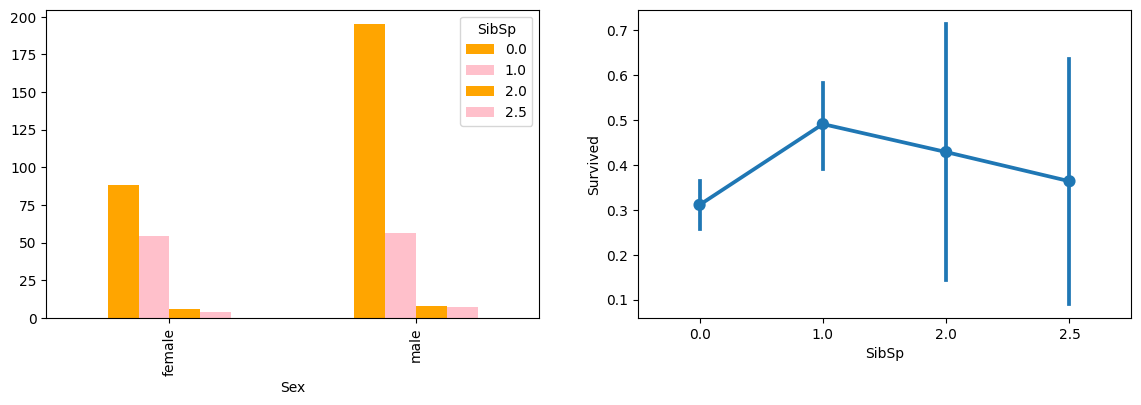

In [108]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
pd.crosstab(df.Sex,df.SibSp).plot(kind="bar",ax=ax1,color=("orange","pink"))
s = df.groupby(['Sex'])['SibSp'].value_counts(normalize=True)
print(s)
sns.pointplot(
    y="Survived",
    x="SibSp",
    data=df,ax=ax2)

Fare       Sex   
0.000000   male      1.000000
3.170800   male      1.000000
6.437500   male      1.000000
6.495800   male      1.000000
6.950000   female    1.000000
                       ...   
63.358300  female    1.000000
65.000000  male      0.666667
           female    0.333333
66.835988  female    0.527273
           male      0.472727
Name: Sex, Length: 177, dtype: float64


<Axes: xlabel='Pclass', ylabel='Fare'>

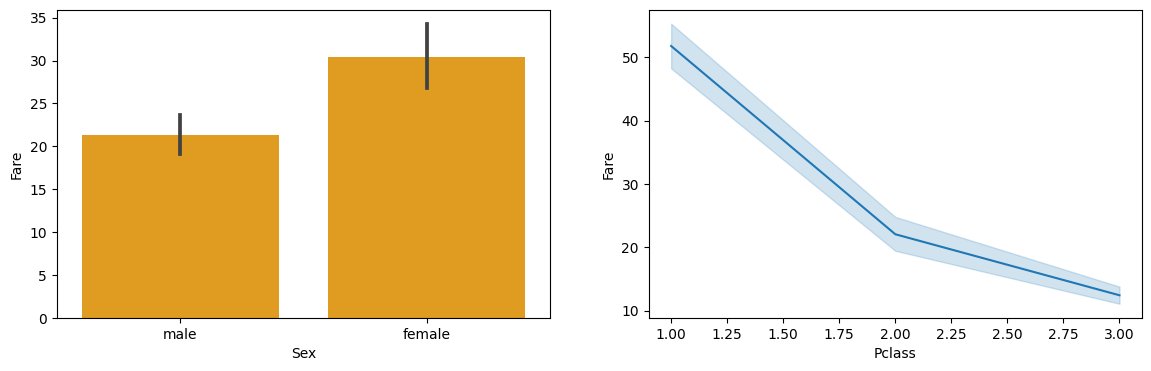

In [109]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sns.barplot(y="Fare",x="Sex",data=df,ax=ax1,color='orange')
s = df.groupby(['Fare'])['Sex'].value_counts(normalize=True)
print(s)
sns.lineplot(
    y="Fare",
    x="Pclass",
    data=df,ax=ax2)

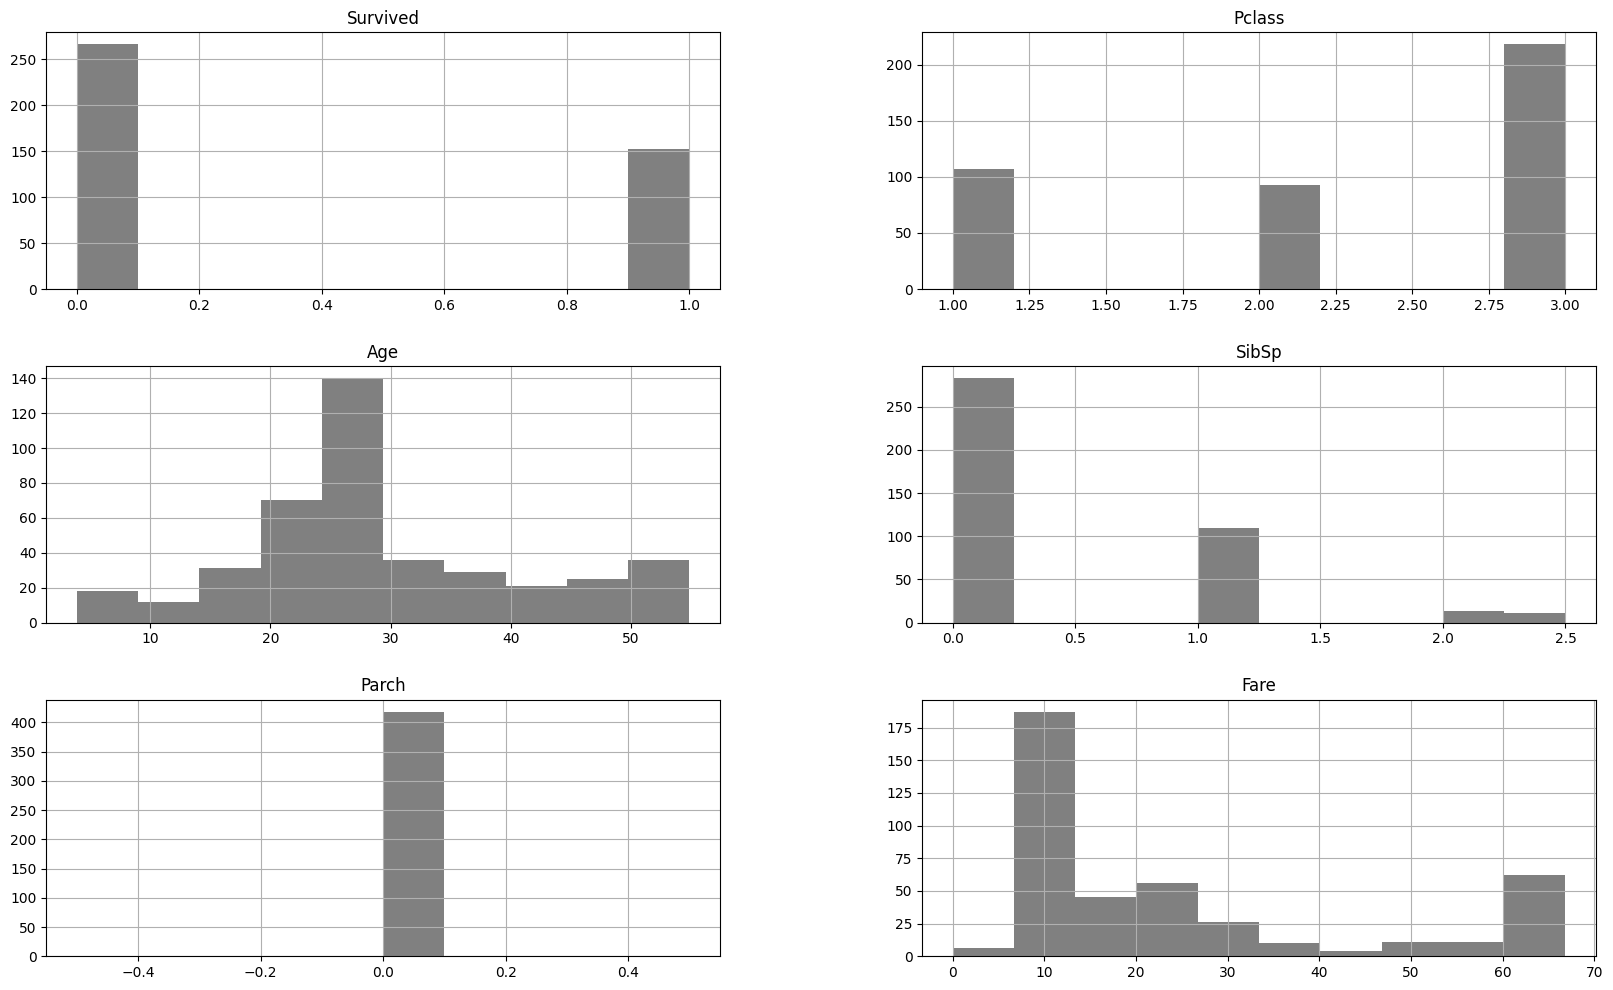

In [110]:
df.hist(figsize = (20,12),color='grey')
plt.show()

Text(0.5, 1.0, "Bar graph of people accrding to ticket class in which people couldn't survive")

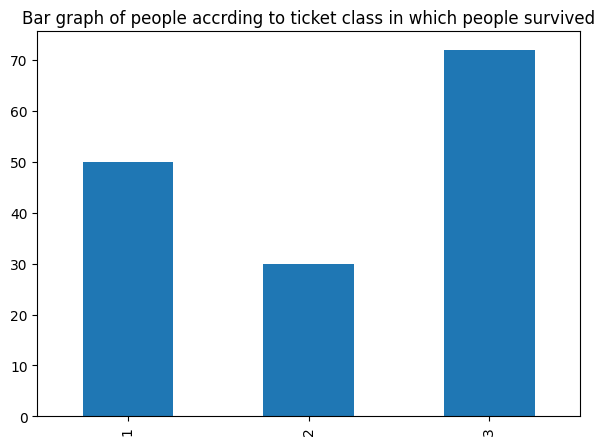

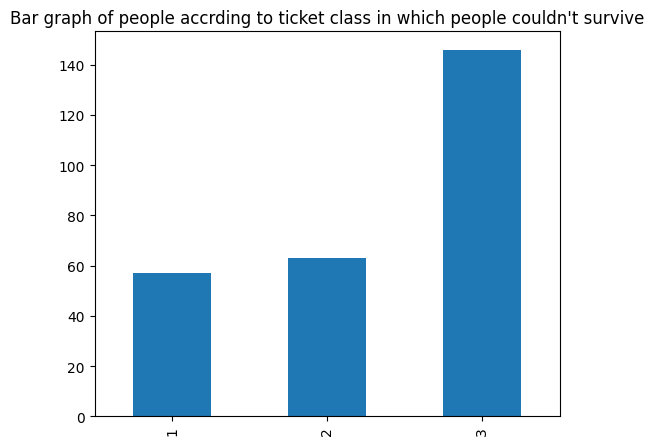

In [111]:
plt.figure(1)
df.loc[df['Survived'] == 1, 'Pclass'].value_counts().sort_index().plot.bar(figsize=(7,5))
plt.title('Bar graph of people accrding to ticket class in which people survived')
plt.figure(2)
df.loc[df['Survived'] == 0, 'Pclass'].value_counts().sort_index().plot.bar(figsize=(6,5))
plt.title('Bar graph of people accrding to ticket class in which people couldn\'t survive')

# DATA ANALYSIS
---

In [112]:
#Encoding the data
def encode(data):
  le=LabelEncoder()
  for i in data.columns:
    if data[i].dtype=="object":
      data[i]=le.fit_transform(data[i])
  return data

In [113]:
encode(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.500,0.0,0.0,7.829200,1
1,1,3,0,47.000,1.0,0.0,7.000000,2
2,0,2,1,54.875,0.0,0.0,9.687500,1
3,0,3,1,27.000,0.0,0.0,8.662500,2
4,1,3,0,22.000,1.0,0.0,12.287500,2
...,...,...,...,...,...,...,...,...
413,0,3,1,27.000,0.0,0.0,8.050000,2
414,1,1,0,39.000,0.0,0.0,66.835988,0
415,0,3,1,38.500,0.0,0.0,7.250000,2
416,0,3,1,27.000,0.0,0.0,8.050000,2


Splitting the data into test and train

In [114]:
x=df.drop(["Survived"],axis=1)
y=df['Survived']

In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [116]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(334, 7)
(84, 7)
(84,)
(334,)


Building a predictive model

In [117]:
def acc_report(actual,predicted):
  acc_score=accuracy_score(actual,predicted)
  cm_matrix=confusion_matrix(actual,predicted)
  clas_rep=classification_report(actual,predicted)
  print("Accuracy :",round(acc_score,2))
  print(" ")
  print(cm_matrix)
  print(" ")
  print(clas_rep)

##Logistic Regression
-----------

In [118]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
preds_lr_train=lr.predict(x_train)
preds_lr_test=lr.predict(x_test)

In [119]:
print("Train=>")
acc_report(y_train,preds_lr_train)
print("Test=>")
acc_report(y_test,preds_lr_test)

Train=>
Accuracy : 1.0
 
[[209   0]
 [  0 125]]
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       209
           1       1.00      1.00      1.00       125

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334

Test=>
Accuracy : 1.0
 
[[57  0]
 [ 0 27]]
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00        27

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



## DECISION TREE
------

In [120]:
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)
preds_dtree_train=dtree.predict(x_train)
preds_dtree_test=dtree.predict(x_test)

In [121]:
print("Train=>")
acc_report(y_train,preds_dtree_train)
print("Test=>")
acc_report(y_test,preds_dtree_test)

Train=>
Accuracy : 1.0
 
[[209   0]
 [  0 125]]
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       209
           1       1.00      1.00      1.00       125

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334

Test=>
Accuracy : 1.0
 
[[57  0]
 [ 0 27]]
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00        27

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



## RANDOM FOREST
----

In [122]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
preds_rf_train=rf.predict(x_train)
preds_rf_test=rf.predict(x_test)

In [123]:
print("Train=>")
acc_report(y_train,preds_rf_train)
print("Test=>")
acc_report(y_test,preds_rf_test)

Train=>
Accuracy : 1.0
 
[[209   0]
 [  0 125]]
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       209
           1       1.00      1.00      1.00       125

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334

Test=>
Accuracy : 1.0
 
[[57  0]
 [ 0 27]]
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00        27

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



## KNN
----

In [124]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
preds_knn_train=knn.predict(x_train)
preds_knn_test=knn.predict(x_test)

In [125]:
print("Train=>")
acc_report(y_train,preds_knn_train)
print("Test=>")
acc_report(y_test,preds_knn_test)

Train=>
Accuracy : 0.8
 
[[185  24]
 [ 43  82]]
 
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       209
           1       0.77      0.66      0.71       125

    accuracy                           0.80       334
   macro avg       0.79      0.77      0.78       334
weighted avg       0.80      0.80      0.80       334

Test=>
Accuracy : 0.69
 
[[46 11]
 [15 12]]
 
              precision    recall  f1-score   support

           0       0.75      0.81      0.78        57
           1       0.52      0.44      0.48        27

    accuracy                           0.69        84
   macro avg       0.64      0.63      0.63        84
weighted avg       0.68      0.69      0.68        84



## GRADIENT BOOSTER
---

In [126]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(x_train, y_train)
preds_gb_train=gb.predict(x_train)
preds_gb_test=gb.predict(x_test)

In [127]:
print("Train=>")
acc_report(y_train,preds_gb_train)
print("Test=>")
acc_report(y_test,preds_gb_test)

Train=>
Accuracy : 1.0
 
[[209   0]
 [  0 125]]
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       209
           1       1.00      1.00      1.00       125

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334

Test=>
Accuracy : 1.0
 
[[57  0]
 [ 0 27]]
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00        27

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



# CONCLUSION
-----------

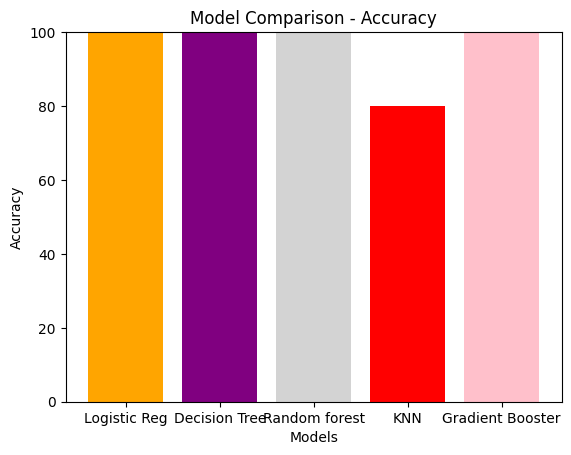

In [128]:
# Model Comparison - Visualization
models = ['Logistic Reg', 'Decision Tree','Random forest','KNN','Gradient Booster']
accuracies = [100,100,100,80,100]

plt.bar(models, accuracies, color=['orange', 'purple', 'lightgrey','red','pink'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison - Accuracy")
plt.ylim([0, 100])
plt.show()

The models are overfitting , since there are less data


------------
---------------